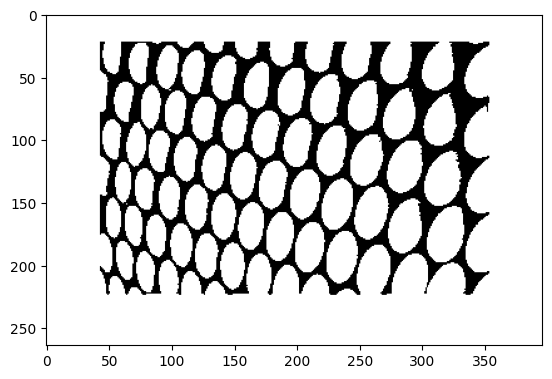

57
Area of contour 0  is  339.5
Area of contour 1  is  523.5
Area of contour 2  is  297.5
Area of contour 3  is  475.5
Area of contour 4  is  764.0
Area of contour 5  is  445.5
Area of contour 6  is  691.5
Area of contour 7  is  389.5
Area of contour 8  is  635.0
Area of contour 9  is  967.0
Area of contour 10  is  331.0
Area of contour 11  is  573.0
Area of contour 12  is  845.0
Area of contour 13  is  277.5
Area of contour 14  is  529.0
Area of contour 15  is  815.0
Area of contour 16  is  481.5
Area of contour 17  is  744.5
Area of contour 18  is  421.0
Area of contour 19  is  695.0
Area of contour 20  is  372.0
Area of contour 21  is  295.0
Area of contour 22  is  629.0
Area of contour 23  is  576.0
Area of contour 24  is  903.5
Area of contour 25  is  516.5
Area of contour 26  is  861.5
Area of contour 27  is  473.0
Area of contour 28  is  767.5
Area of contour 29  is  392.5
Area of contour 30  is  692.5
Area of contour 31  is  381.5
Area of contour 32  is  338.0
Area of contour 3

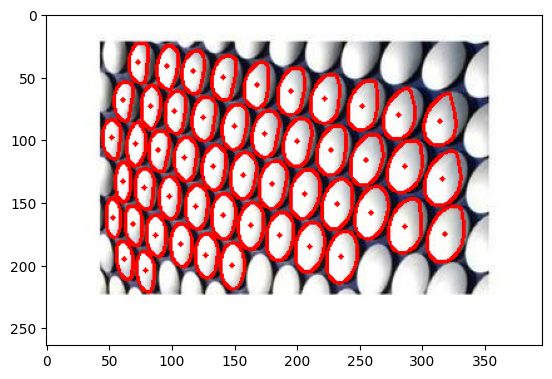

In [3]:
import cv2
import matplotlib.pyplot as plt
import sys

# read the image
image = cv2.imread('../../images/lines.jpg')

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# create a binary thresholded image
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw all contours
#image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

print(len(contours))

#print(contours)

# show the image with the drawn contours


#iterate through contours list
count=0
for c in contours:
    area = cv2.contourArea(c)

    if area > 30 and area < 5000 :
        M = cv2.moments(c)
        #print(M)
        cX = int(M['m10']/M['m00'])
        cY = int(M['m01']/M['m00'])
        hull = cv2.convexHull(c)
        cv2.circle(image, (cX, cY), 2, (255, 0, 0), -1)
        cv2.drawContours(image, [hull], 0, (255, 0, 0), 2)
        #area = cv2.contourArea(c)
        print('Area of contour', count, ' is ',area)
        count+=1

print(count)
plt.imshow(image)
plt.show()